In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('/content/clean_dataset.csv')

# Split the dataset into features (X) and labels (y)
X = data[['Column_Timestamp', 'Column_22_23', 'Col1292', 'Col1293']]
y = data['Column_labels']

data

,Column_Timestamp,Column_22_23,Col1292,Col1293,Column_labels
0,1679050325,1036288,32,32384,1
1,1679053325,1060864,32,33152,1
2,1679056325,1101824,32,34432,1
3,1679059325,1110016,32,34688,1
4,1679062325,1126400,32,35200,1
...,...,...,...,...,...
924,1681822325,1397664,32,43677,1
925,1681825325,1397664,32,43677,1
926,1681828325,1397664,32,43677,1
927,1681831325,1397664,32,43677,1


## DecisionTreeClassifier

 Let's go through the code step by step:



*   **Read the CSV file**
*   **Split the dataset into features (X) and labels (y):** Here, the columns 'Column_Timestamp', 'Column_22_23', 'Col1292', and 'Col1293' are selected as the features (X) and stored in the DataFrame X. The 'Column_labels' column is selected as the labels (y) and stored in the Series y.
*   **Split the data into train and test sets:** The first 80% of the data is used for training, and the remaining 20% is used for testing
*   **Train the Decision Tree model:** An instance of the DecisionTreeClassifier class is created, and the fit() method is called to train the model using the training data (X_train and y_train).
*   **Predict anomalies on the test set**
*   **Visualize the anomalies**



Accuracy: 0.967741935483871


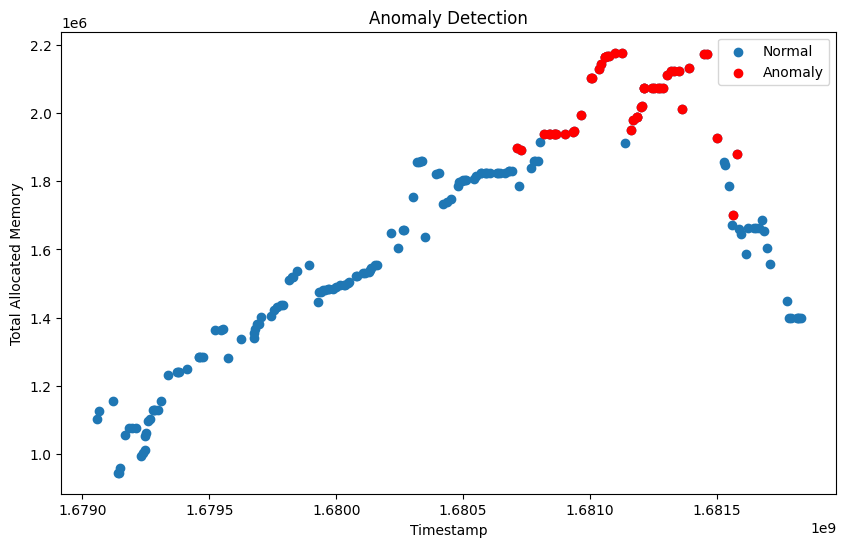

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('/content/clean_dataset.csv')

# Split the dataset into features (X) and labels (y)
X = data[['Column_Timestamp', 'Column_22_23', 'Col1292', 'Col1293']]
y = data['Column_labels']


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict anomalies on the test set
y_pred = model.predict(X_test)

# Compute and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the anomalies
anomaly_indices = [i for i, label in enumerate(y_pred) if label == 0]
anomaly_timestamps = X_test.iloc[anomaly_indices]['Column_Timestamp']
anomaly_values = X_test.iloc[anomaly_indices]['Column_22_23']

plt.figure(figsize=(10, 6))
plt.scatter(X_test['Column_Timestamp'], X_test['Column_22_23'], label='Normal')
plt.scatter(anomaly_timestamps, anomaly_values, color='r', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Total Allocated Memory')
plt.title('Anomaly Detection')
plt.legend()
plt.show()


## LogisticRegression

 Let's go through the code step by step:



*   **Read the CSV file**
*   **Split the dataset into features (X) and labels (y):** Here, the columns 'Column_Timestamp', 'Column_22_23', 'Col1292', and 'Col1293' are selected as the features (X) and stored in the DataFrame X. The 'Column_labels' column is selected as the labels (y) and stored in the Series y.
*   **Split the data into train and test sets:** The first 80% of the data is used for training, and the remaining 20% is used for testing
*   **Train the LogisticRegression model:** An instance of the LogisticRegression class is created
*   **Predict anomalies on the test set**
*   **Visualize the anomalies**



Accuracy: 0.9623655913978495


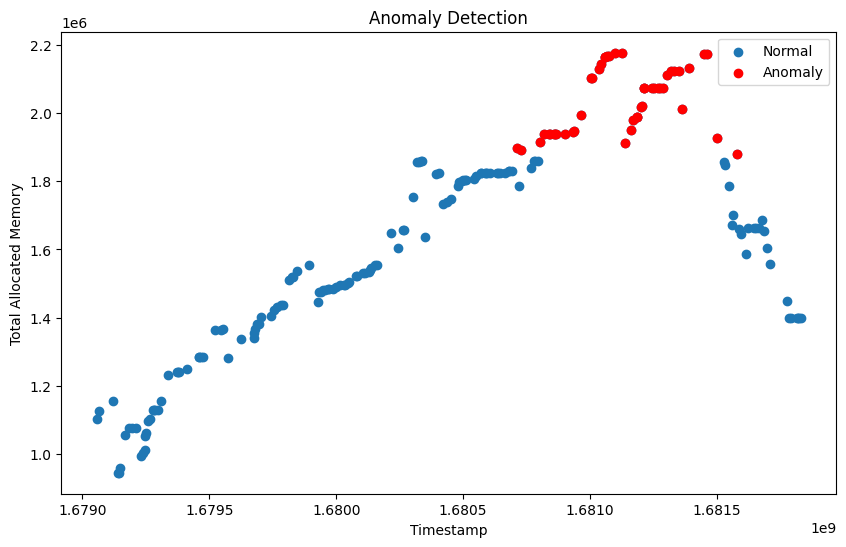

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('/content/clean_dataset.csv')

# Split the dataset into features (X) and labels (y)
X = data[['Column_Timestamp', 'Column_22_23', 'Col1292', 'Col1293']]
y = data['Column_labels']


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict anomalies on the test set
y_pred = model.predict(X_test)

# Compute and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the anomalies
anomaly_indices = [i for i, label in enumerate(y_pred) if label == 0]
anomaly_timestamps = X_test.iloc[anomaly_indices]['Column_Timestamp']
anomaly_values = X_test.iloc[anomaly_indices]['Column_22_23']

plt.figure(figsize=(10, 6))
plt.scatter(X_test['Column_Timestamp'], X_test['Column_22_23'], label='Normal')
plt.scatter(anomaly_timestamps, anomaly_values, color='r', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Total Allocated Memory')
plt.title('Anomaly Detection')
plt.legend()
plt.show()


## Support Vector Machine (SVM) algorithm

Accuracy: 0.9408602150537635


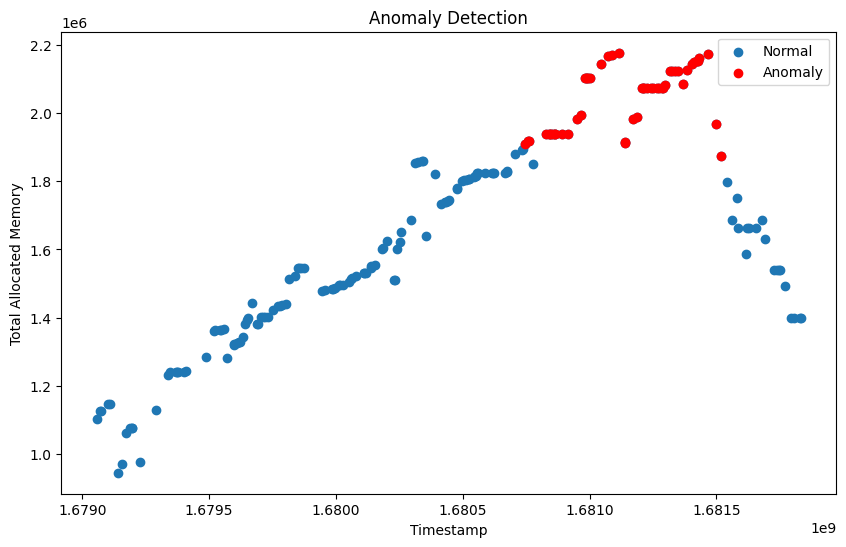

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Read the CSV file
data = pd.read_csv('/content/clean_dataset.csv')

# Split the dataset into features (X) and labels (y)
X = data[['Column_Timestamp', 'Column_22_23', 'Col1292', 'Col1293']]

y = data['Column_labels']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, stratify = y)

sc = StandardScaler()

#print(X_train)
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Train the SVM model
model = SVC(C=1.0, kernel='linear')
model.fit(X_train_std, y_train)

# Predict anomalies on the test set
y_pred = model.predict(X_test_std)

# Compute and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the anomalies
anomaly_indices = [i for i, label in enumerate(y_pred) if label == 0]
anomaly_timestamps = X_test.iloc[anomaly_indices]['Column_Timestamp']
anomaly_values = X_test.iloc[anomaly_indices]['Column_22_23']

plt.figure(figsize=(10, 6))
plt.scatter(X_test['Column_Timestamp'], X_test['Column_22_23'], label='Normal')
plt.scatter(anomaly_timestamps, anomaly_values, color='r', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Total Allocated Memory')
plt.title('Anomaly Detection')
plt.legend()
plt.show()


## Naive Bayes

Accuracy: 0.8655913978494624


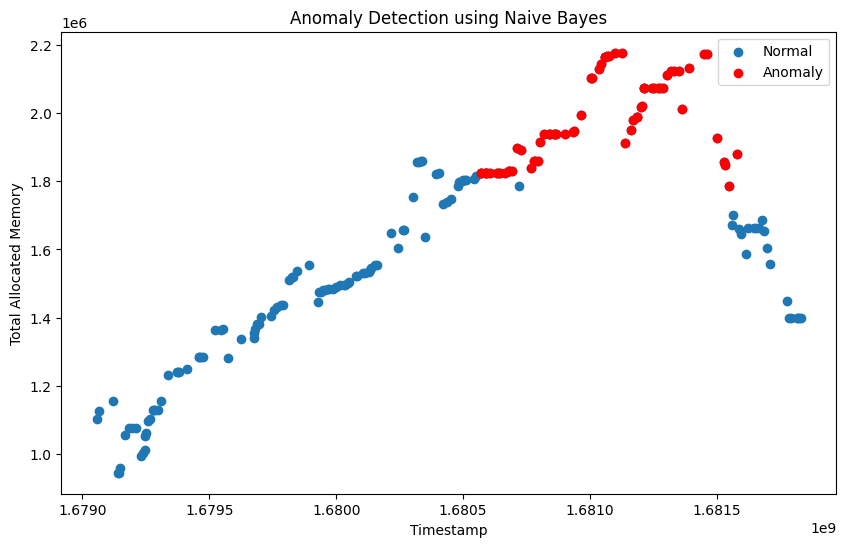

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('/content/clean_dataset.csv')

# Split the dataset into features (X) and labels (y)
X = data[['Column_Timestamp', 'Column_22_23', 'Col1292', 'Col1293']]
y = data['Column_labels']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict anomalies on the test set
y_pred = model.predict(X_test)

# Compute and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the anomalies
anomaly_indices = [i for i, label in enumerate(y_pred) if label == 0]
anomaly_timestamps = X_test.iloc[anomaly_indices]['Column_Timestamp']
anomaly_values = X_test.iloc[anomaly_indices]['Column_22_23']

plt.figure(figsize=(10, 6))
plt.scatter(X_test['Column_Timestamp'], X_test['Column_22_23'], label='Normal')
plt.scatter(anomaly_timestamps, anomaly_values, color='r', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Total Allocated Memory')
plt.title('Anomaly Detection using Naive Bayes')
plt.legend()
plt.show()


#Test

Accuracy: 0.8853046594982079


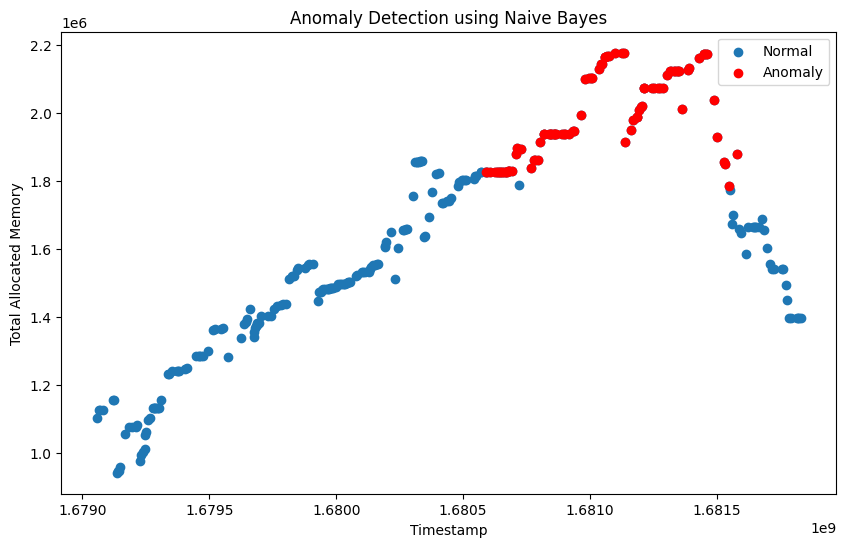

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('/content/clean_dataset_with_decrease.csv')

# Split the dataset into features (X) and labels (y)
X = data[['Column_Timestamp', 'Column_22_23', 'Col1292', 'Col1293']]
y = data['Column_labels']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict anomalies on the test set
y_pred = model.predict(X_test)

# Compute and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the anomalies
anomaly_indices = [i for i, label in enumerate(y_pred) if label == 0]
anomaly_timestamps = X_test.iloc[anomaly_indices]['Column_Timestamp']
anomaly_values = X_test.iloc[anomaly_indices]['Column_22_23']

plt.figure(figsize=(10, 6))
plt.scatter(X_test['Column_Timestamp'], X_test['Column_22_23'], label='Normal')
plt.scatter(anomaly_timestamps, anomaly_values, color='r', label='Anomaly')
plt.xlabel('Timestamp')
plt.ylabel('Total Allocated Memory')
plt.title('Anomaly Detection using Naive Bayes')
plt.legend()
plt.show()
